한국 복지 패널은 빈곤층, 근로빈곤층, 차상하위 계층 등 다양한 계층의 규모 및 생활 변화를 동태적으로 파악함으로써 정책 형성에 기여를 하고 있다.

한국 복지 패널 데이터 확인
https://www.koweps.re.kr:442/main.do

```
- h12_g3 : 성별 - 남자(1), 여자(2), 모름/무응답(3)
- h12_g4 : 태어난 년도, 1900 - 2014, 모름/무응답(9999)
- h12_g10 : 혼인상태. 유배우(1), 사별(2), 이혼(3), 별거(4), 미혼(5, 18세 이상 미혼모 포함), 기타(6, 사망 등), 해당없음(18세 미만, 0), 모름/무응답(9)
- h12_g11 : 종교, 있음(1), 없음(2), 모름/무응답(9)
- h12_eco9 : 직종, 직종 코드표 참조, 모름/무응답(9)
- p1202_8aq1 " 일을 한 달의 월 평균 임금(1~9998, 단위 만원), 모름/무응답(9999)
- h12_reg7 : 7개 권역별 지역 구분, 서울(1), 수도권(2, 인천/경기), 부산/경남/울산(3), 대구/경북(4), 대전/충남(5), 강원/충북(6), 광주/전남/전북/제주도(7)
```

In [25]:
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

# 그래프 설정
# 폰트 설정
plt.rcParams["font.family"] = "Malgun Gothic"
# 그래프 크기
plt.rcParams["figure.figsize"] = 20, 10
# 글자 크기
plt.rcParams["font.size"] = 16
# 폰트 설정 시 - (-)기호 깨지는 것 방지
plt.rcParams["axes.unicode_minus"] = False

### 데이터를 읽어온다.

In [2]:
df = pd.read_excel("data/dataset2017.xlsx")
df.head()

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15422 entries, 0 to 15421
Columns: 1191 entries, h12_id to h12_pers_income5
dtypes: float64(999), int64(191), object(1)
memory usage: 140.1+ MB


### 조사 대상에 대한 성별 분포를 확인한다.

In [15]:
# 성별 컬럼만 추출하도록 합시다.
# 시리즈로 추출
df1 = df["h12_g3"]

# DateFrame으로 추출
# 없는 이름을 넣으면 오류 발생
# df1 = df[["h12_g3"]]

# 없는 이름을 넣으면 무시된다.
df1 = df.filter(["h12_g3"])

df1

,h12_g3
0,2
1,2
2,1
3,1
4,2
...,...
15417,2
15418,2
15419,1
15420,2


In [16]:
# 컬럼 이름을 변경한다.
df1.columns = ["성별"]
df1

,성별
0,2
1,2
2,1
3,1
4,2
...,...
15417,2
15418,2
15419,1
15420,2


In [17]:
# 결측치 확인
df1["성별"].isna().sum()

0

성별에는 결측치가 존재하지 않는다.

In [18]:
# 이상치 확인. 레이블 데이터 이므로 value_counts로 확인한다.
df1["성별"].value_counts()

2    8440
1    6982
Name: 성별, dtype: int64

성별에는 이상치는 존재하지 않는다.

In [19]:
# 성별값을 남자, 여자로 변경한다.
dict1 = {
    1: "남자",
    2: "여자"
}

df1["성별"] = df1["성별"].map(dict1)
df1["성별"]

0        여자
1        여자
2        남자
3        남자
4        여자
         ..
15417    여자
15418    여자
15419    남자
15420    여자
15421    남자
Name: 성별, Length: 15422, dtype: object

In [20]:
# 성별 분포값을 가져온다.
a1 = df1["성별"].value_counts()
a1

여자    8440
남자    6982
Name: 성별, dtype: int64

In [24]:
# 데이터프레임 생성
df2 = pd.DataFrame(a1)
df2.columns = ["명"]
df2

,명
여자,8440
남자,6982


In [28]:
%matplotlib notebook

<IPython.core.display.Javascript object>


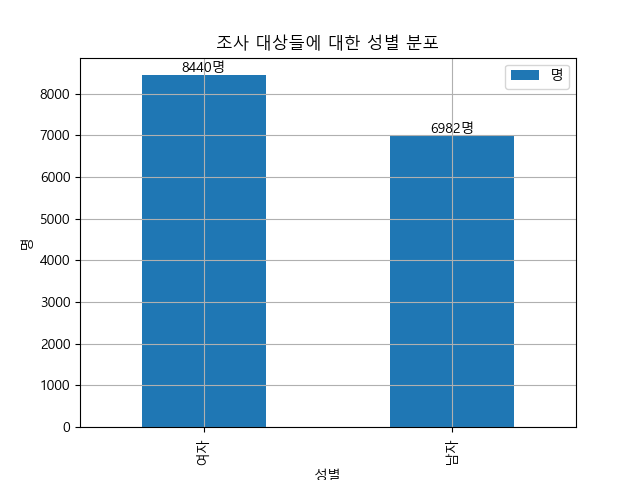

In [40]:
df2.plot.bar()

# 타이틀
plt.title("조사 대상들에 대한 성별 분포")

plt.grid()

plt.xlabel("성별")
plt.ylabel("명")

for idx, value in enumerate(df2["명"]):
    plt.text(idx, value, f"{value}명",
            horizontalalignment="center",
            verticalalignment="bottom")

plt.show()

In [36]:
list1 = [10, 20, 30, 40]
list(enumerate(list1))

[(0, 10), (1, 20), (2, 30), (3, 40)]

### 성별에 따른 평균 월급 차이 분석


In [45]:
# 데이터 추출
df1 = df[["h12_g3", 'p1202_8aq1']]
df1

,h12_g3,p1202_8aq1
0,2,NaN
1,2,NaN
2,1,NaN
3,1,108.9
4,2,NaN
...,...,...
15417,2,NaN
15418,2,NaN
15419,1,72.0
15420,2,NaN


In [47]:
# 칼럼 이름을 변경
# 모든 컬럼의 이름을 변경하고자 할 때,
#df1.columns = ["성별", "월급"]

# 일부 컬럼의 이름을 변경하고자 할때,
dict1 = {
    "h12_g3" : "성별",
    "p1202_8aq1" : "월급"
}
df1.rename(columns=dict1, inplace=True)

df1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,성별,월급
0,2,NaN
1,2,NaN
2,1,NaN
3,1,108.9
4,2,NaN
...,...,...
15417,2,NaN
15418,2,NaN
15419,1,72.0
15420,2,NaN


In [48]:
# 성별값을 남자, 여자로 변경한다.
dict1 = {
    1: "남자",
    2: "여자"
}

df1["성별"] = df1["성별"].map(dict1)
df1["성별"]

<ipython-input-48-fc25f810e9bf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["성별"] = df1["성별"].map(dict1)


0        여자
1        여자
2        남자
3        남자
4        여자
         ..
15417    여자
15418    여자
15419    남자
15420    여자
15421    남자
Name: 성별, Length: 15422, dtype: object

In [49]:
# 결측치 확인
df1.isna().sum()

성별        0
월급    10915
dtype: int64

In [50]:
# 이상치 확인
df1["월급"].agg(['min', 'max'])

min       0.0
max    1874.0
Name: 월급, dtype: float64

월급에는 결측치가 존재하고, 1 미만의 이상치가 존재한다.

In [51]:
# 월급에 결측치가 있는 행을 제거한다.
df1.dropna(subset=["월급"], inplace=True)
df1.isna().sum()

<ipython-input-51-57302295f3d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(subset=["월급"], inplace=True)


성별    0
월급    0
dtype: int64

In [54]:
# 월급이 1 미만인 사람들의 인덱스를 가져온다.
idx = df1.query("월급 <1").index
# 제거한다.
df1.drop(idx, inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# 인덱스만 구할줄 알면 모든 것을 다 구할 수 있다.
# 반드시 명심!!

In [55]:
df1["월급"].min()

2.0

In [56]:
# 성별별 평균 급여를 계산한다.
df2 = df1.groupby("성별").mean()
df2

,월급
성별,
남자,333.422185
여자,176.359967


<IPython.core.display.Javascript object>


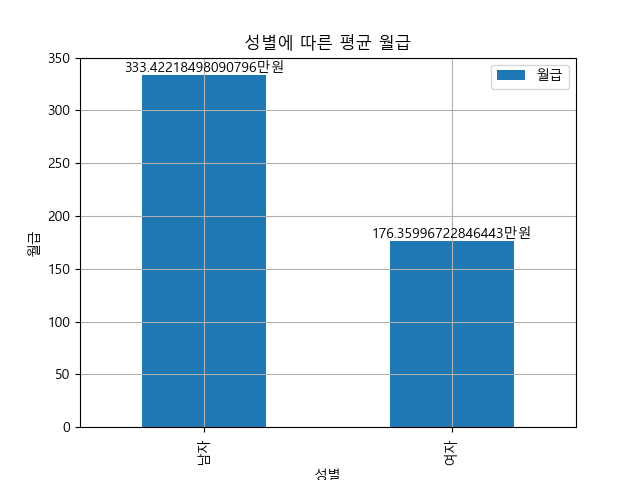

In [57]:
df2.plot.bar()

# 타이틀
plt.title("성별에 따른 평균 월급")

# 그리드 표시
plt.grid()

plt.xlabel("성별")
plt.ylabel("월급")

for idx, value in enumerate(df2["월급"]):
    plt.text(idx, value, f"{value}만원",
            horizontalalignment="center",
            verticalalignment="bottom")

plt.show()

### 나이에 따른 평균 월급 변화

In [58]:
# 데이터 추출
df1 = df[["h12_g4", "p1202_8aq1"]]
df1

,h12_g4,p1202_8aq1
0,1936,NaN
1,1945,NaN
2,1948,NaN
3,1942,108.9
4,1923,NaN
...,...,...
15417,1967,NaN
15418,1992,NaN
15419,1995,72.0
15420,1998,NaN


In [59]:
# 컬럼 이름 변경
df1.columns = ["태어난년도", "월급"]
df1

,태어난년도,월급
0,1936,NaN
1,1945,NaN
2,1948,NaN
3,1942,108.9
4,1923,NaN
...,...,...
15417,1967,NaN
15418,1992,NaN
15419,1995,72.0
15420,1998,NaN


In [60]:
# 결측치 확인
df1.isna().sum()

태어난년도        0
월급       10915
dtype: int64

In [61]:
# 이상치 확인
df1.agg(["min", "max"])

,태어난년도,월급
min,1907,0.0
max,2016,1874.0


In [66]:
# 이상치 제거 - 태어난 년도
# 2014 초과는 이상치에 해당한다.
idx = df1.query("태어난년도 > 2014").index
idx
# 삭ㅋ제ㅋ
df1.drop(idx, inplace=True)

df1["태어난년도"].max()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


2014

In [68]:
# 월급 이상치 처리
idx = df1.query("월급<1").index
idx

# 정ㅋ벅ㅋ
df1.drop(idx, inplace=True)
df1["월급"].min()

2.0

In [70]:
# 나이를 구한다.
# 2017년을 기준으로 한 나이를 구한다.
a1 = 2017 - df1["태어난년도"] + 1
df1["나이"] = a1
df1

<ipython-input-70-7260d75e282e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["나이"] = a1


,태어난년도,월급,나이
0,1936,NaN,82
1,1945,NaN,73
2,1948,NaN,70
3,1942,108.9,76
4,1923,NaN,95
...,...,...,...
15417,1967,NaN,51
15418,1992,NaN,26
15419,1995,72.0,23
15420,1998,NaN,20


In [71]:
# 월급 결측치 처리를 위해 나이대 컬럼을 추가한다.
df1["연령대"] = df1["나이"] // 10  * 10
df1

<ipython-input-71-0ea5ae0048a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["연령대"] = df1["나이"] // 10  * 10


,태어난년도,월급,나이,연령대
0,1936,NaN,82,80
1,1945,NaN,73,70
2,1948,NaN,70,70
3,1942,108.9,76,70
4,1923,NaN,95,90
...,...,...,...,...
15417,1967,NaN,51,50
15418,1992,NaN,26,20
15419,1995,72.0,23,20
15420,1998,NaN,20,20


In [78]:
# 연령대 구성을 확인한다.
age_agg = df1["연령대"].value_counts().index
age_agg

Int64Index([70, 40, 50, 60, 10, 80, 30, 20, 0, 90, 100, 110], dtype='int64')

In [88]:
# 연령대별 급여 평균 구한다.
a1 = df1.groupby("연령대")["월급"].mean()
# 연령대별 급여 평균에 결측치를 0으로 채워준다.
a1.fillna(0, inplace=True)
a1

연령대
0        0.000000
10       0.000000
20     177.780800
30     287.524239
40     327.990407
50     300.460513
60     179.635701
70      75.360135
80      31.739726
90      20.000000
100      0.000000
110      0.000000
Name: 월급, dtype: float64

In [99]:
# 연령대의 수 만큼 반복한다.
for age2 in age_agg : 
    # 연령대 급여 평균을 구한다.
    avg2 = a1[age2]
    
    # 현재 연령대에 해당하는 로우들을 가져온다.
    rows = df1.query(f"연령대 == {age2}")
    
    # 가져온 로우에서 월급이 결측치인 것만 가져온다.
    a100 = rows["월급"].isna()
    idx100 = rows[a100].index
    
    # 월급을 채워준다.
    df1.loc[idx100, "월급"] = avg2
   


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [100]:
df1["월급"].isna().sum()


0

In [104]:
# 월급과 나이만 출력한다.
df2 = df1[["월급", "나이"]]
df2

,월급,나이
0,31.739726,82
1,75.360135,73
2,75.360135,70
3,108.900000,76
4,20.000000,95
...,...,...
15417,300.460513,51
15418,177.780800,26
15419,72.000000,23
15420,177.780800,20


In [108]:
# 나이를 기준으로 그룹을 묶어 월급의 평균을 구한다.
df3 = df2.groupby("나이").mean()
df3.sort_values("월급", ascending=False)

,월급
나이,
42,339.830150
44,336.342081
46,330.801389
40,330.412625
47,329.017228
...,...
9,0.000000
8,0.000000
7,0.000000


<IPython.core.display.Javascript object>


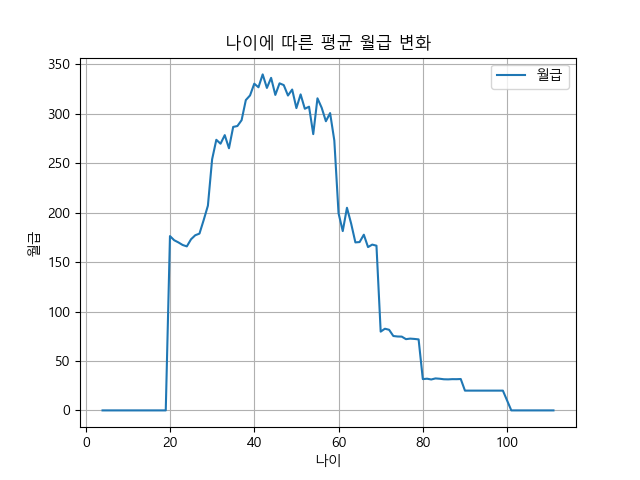

In [110]:
df3.plot()
plt.title("나이에 따른 평균 월급 변화")
plt.grid()
plt.xlabel("나이")
plt.ylabel("월급")
plt.show()